In [3]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import anansescanpy as asc
import os
import numpy as np

work_dir = '../../output'
outputdir=f"{work_dir}/infer/ananse/"
# os.makedirs(outputdir)


In [ ]:

# Fill in the directories where the h5ad RNA and ATAC objects are located
atac_PBMC=sc.read(f'{work_dir}/scATAC/adata_atac.h5ad')
rna_PBMC=sc.read(f'{work_dir}/scRNA/adata_rna.h5ad')

def filter_chr(peaks):
    chrs = [peak.split(':')[0] for peak in peaks]
    mask = np.asarray([True if ('chr' in chr) else False for chr in chrs])
    return mask
    
mask = filter_chr(atac_PBMC.var.index)

atac_PBMC = atac_PBMC[:, mask]

rna_PBMC.obs['cell_type']=rna_PBMC.obs['cell_type'].str.replace(' ', '-').astype('category')
rna_PBMC.obs['cell_type']=rna_PBMC.obs['cell_type'].str.replace('_', '-').astype('category')
atac_PBMC.obs['cell_type']=atac_PBMC.obs['cell_type'].str.replace(' ', '-').astype('category')
atac_PBMC.obs['cell_type']=atac_PBMC.obs['cell_type'].str.replace('_', '-').astype('category')


minimal=25
asc.export_CPM_scANANSE(anndata=rna_PBMC,
min_cells=minimal,
outputdir=outputdir,
cluster_id="cell_type"
)
asc.export_ATAC_scANANSE(anndata=atac_PBMC,
min_cells=minimal,
outputdir=outputdir,
cluster_id="cell_type"
)
asc.config_scANANSE(anndata=rna_PBMC,
min_cells=minimal,
outputdir=outputdir,
cluster_id="cell_type"
)
asc.DEGS_scANANSE(anndata=rna_PBMC,
min_cells=minimal,
outputdir=outputdir,
cluster_id="cell_type"
)

# Process results

In [9]:
df = pd.read_csv(f"{outputdir}/network/B-cells.tsv", sep='\t')

In [24]:
df[['source', 'target']] = df['tf_target'].str.split('—', expand=True)

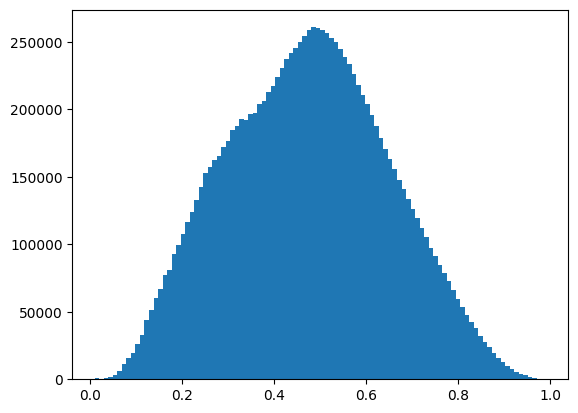

In [29]:
aa = plt.hist(df.prob.values, bins=100)

In [30]:
df = df.rename(columns={'prob':'weight'})[['source', 'target', 'weight']]
df

,source,target,weight
0,AHR,A1BG,0.714121
1,AHR,A1BG-AS1,0.725448
2,AHR,A2M,0.547868
3,AHR,A2M-AS1,0.522494
4,AHR,A2ML1,0.396101
...,...,...,...
12186225,ZSCAN31,ZXDC,0.489363
12186226,ZSCAN31,ZYG11A,0.231023
12186227,ZSCAN31,ZYG11B,0.392957
12186228,ZSCAN31,ZYX,0.468442


In [34]:
df.target.unique().shape

(22778,)